<a href="https://colab.research.google.com/github/Shuaynat/DSE-23-24/blob/main/05-classes/Copy_of_DS23_ICEF_class5_yn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science in Economics

### Class -5 Gradient boosting

05/10/23


<fieldset>
  <legend><font color="#282FA4 "><b>Class plan</b></font></legend>

Part 1: Theory behing GB
<div>
    <input type="checkbox" id="point1" name="point1"/>
    <label for="scales"> //Theory behing GB </label>
  </div>


Part 2: models - three ML atlants
<div>
    <input type="checkbox" id="point1" name="point1"/>
    <label for="scales"> Comparison: CatBoost, XGBoost, LightGMB</label>
  </div>






</fieldset>

# Part 1: Theory behind GB

#### **GB general idea**


Бустинг последовательно обучает набор базовых моделей таким образом, что каждая следующая модель пытается исправить ошибки работы предыдущей модели.

Логика того, как учитываются ошибки предыдущей модели может быть разной.

В алгоритме градиентного бустинга каждая следующая модель обучается на "невязках" предыдущей модели, минимизируя итоговую функцию потерь.

У каждого следующего алгоритма вычисляется вес $\alpha$, с которым он входит в ансамбль. Также есть параметр скорости обучения (learning rate), который не позволяет алгоритму переобучитсья. Вес $\alpha$ можно находить, используя одномерную оптимизацию.

Можно записать процедуру обучения по шагам (будем рассматривать случай бинарной классификации c метками классов {0,1}, чтобы не усложнять жизнь):
1. Настройка базового алгоритма $b_0$.
    
    Алгоритм настраиваются на $y$ с помощью функции MSE.
    
    
2. Будем обозначать текущий небазовый алгоритм - $a$:
    
    $$a_i(x) = \sum_{j=0}^i \alpha_j b_j(x) $$
    
3. Настройка базового алгоритма $b_i$ (обычно это регрессионное дерево):
    
    $$b_i = \arg \min_b \sum_{j=1}^l (b(x_j) + \nabla L(a_{i-1}(x_j), y))^2,$$
    т.е. выход очередного базового алгоритма подстраивается под антиградиент функции потерь
    
4. Настройка веса базового алгоритма $\alpha_i$:
    
    $$\alpha_i = \min_{\alpha > 0} \sum_{j=1}^l L(a_{i-1} + \alpha b_i(x_j), y) $$
    
В случае классфикации будем использовать логистическую функцию потерь. Немного упростим ее:

$$L = -y\log\sigma(a) - (1-y)\log(1 - \sigma(a)) = -\log(1 - \sigma(a)) - y \log \frac{\sigma(a)}{1 - \sigma(a)},$$
где $\sigma$ - функция сигмоиды. Ответ после очередного базового алгоритма надо прогонять через сигмоиду, т.к. не гарантируется, что ответы будут лежать на [0,1] - в этом особенность базового алгоритма (который является регрессионным).

Преобразуем:
$$\log (1 - \sigma(a)) = \log \frac{1}{1 + \exp(a)} = -\log(1 + \exp(a)) $$

$$\log (\frac{\sigma(a)}{1 - \sigma(a)}) = \log(\exp(a)) = a $$

Таким образом:

$$L = -ya + \log(1 + \exp(a))$$

Тогда будем вычислять градиент как:

$$\nabla L = - y + \sigma(a)$$


🔗 [More info: Alexander Diakonov notes](https://alexanderdyakonov.files.wordpress.com/2017/06/book_boosting_pdf.pdf)

#### **GB for random trees**



**Problem statement**

The solution is found in the form of sum over random trees $h_m(x)$,
$$F(x) = \sum_{m=1}^{M} h_m(x).$$

The additive model is built in a greedy fashion:
$$f_m(x) = f_{m-1}(x) + h_m(x).$$

Having loss function $L(y, f)$, we find every new tree from the optimization
$$h_m =  \arg\min_{h} \sum_{i=1}^{n} L(y_i, f_{m-1}(x_i) + h(x_i)).$$

**Problem solution**

Linear approximation of loss function $L(y, f)$ and the gradient descent method:

$$\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, f_{m-1}(x_i)
- \gamma \frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}).$$

A random tree $h(x)$ is fit to targets that are the gradients $\quad -\frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}.$

A new tree is added to the approximation with optimal $\gamma_m$ and additional shrinkage $\nu$:

$$f_m(x) = f_{m-1}(x) + \nu \gamma_m h_m(x).$$

The initial model $f_0(x)$ is problem specific, for least-squares regression one usually chooses the mean of the target values.


🔗 [Source](https://github.com/adasegroup/ML2020_seminars/blob/master/seminar8/seminar_GB_solutions.ipynb)

**Problem 1:L-2 boosting**


1. **Show that for squared loss function each tree in Gradient Boosting is fit to the targets that are simply the differences $y_i-f_{m-1}(x_i)$ between the values $y_i$ and the current approximation $f_{m-1}(x_i)$ found on the previous step $m-1$**


<details>
  <summary> <font color="#282FA4 "><b>Solution idea</b></font> </summary>



> In case of Gradient Boosting for regression with the squared error loss




> $$L(y_i, f(x_i)) = \frac{1}{2}[y_i-f(x_i)]^2.$$


> The gradients
> $$ r_{im} = - \left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f=f_{m-1}}$$
are calculated for each data point $(x_i, y_i)$ on every step $m$. Then a regression tree is fit to the targets $r_{im}$. For the squared error loss the negative gradient is exactly the difference between the
> $$r_{im} = y_i-f_{m-1}(x_i).$$

</details>

2. **What is the value of shrinkage parameter gamma in this case? **


<details>
  <summary> <font color="#282FA4 "><b>Solution idea</b></font> </summary>

>For the squared error loss $L(y_i, f(x_i)) = \frac{1}{2}[y_i-f(x_i)]^2$ we have
$$ L\left(y_i, f_{m-1}(x_i) - \gamma \nabla_F L(y_i, f_{m-1}(x_i))\right) =
 \frac{1}{2} (1 - \gamma)^2 (y_i - f_{m-1}(x_i))^2,
$$
and thus $\gamma_m=1$ or in other words we can skip the steepest descent in this case.

</details>


3. **Code gradient boosting for regression tree with squared loss by hands**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

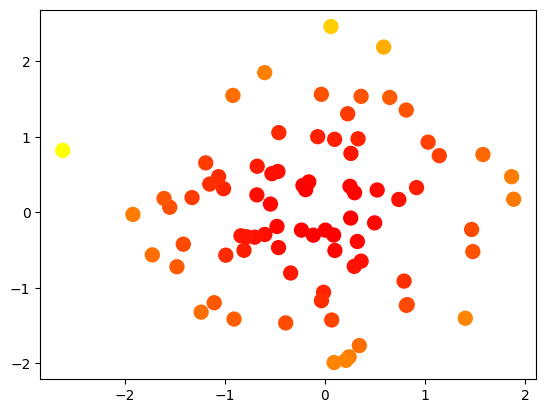

In [ ]:
# generate synthetic dataset

num_samples = 80
dimension = 2

np.random.seed(42)


X_data = np.random.normal(size = (num_samples, dimension))

y_data = X_data[:,1]**2 + X_data[:,0]**2

plt.scatter(X_data[:, 0], X_data[:, 1],c=y_data, s = 100,cmap = "autumn")

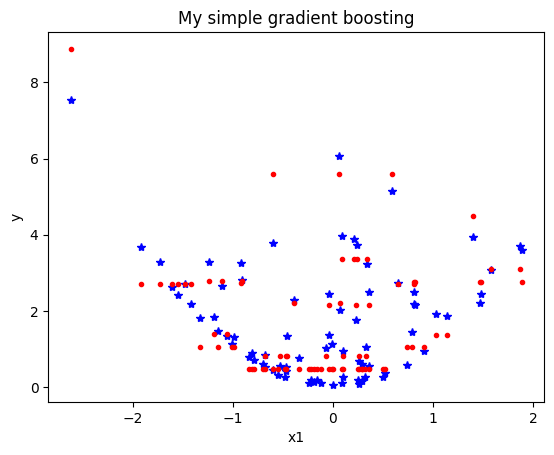

In [ ]:
# My simple gradient boosting

max_depth = 1
n_estimators = 10


f = np.mean(y_data)                      # initialization
for m in range(1, n_estimators+1):
    clf = DecisionTreeRegressor(max_depth=max_depth)
    nu = 1
    #
    f = f + clf.fit(X_data, y_data - f).predict(X_data) * nu # fit to the difference and shrink

plt.plot(X_data[:,0], y_data, '*b')
plt.plot(X_data[:,0],f, '.r')
plt.title('My simple gradient boosting')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()


Compare with Bagging algorithm

[1.5713362  1.77089865 1.55215802 1.60331763 1.56636181 1.55215802
 1.75827991 1.72125646 1.56739905 1.77352095 1.58911384 1.75827991
 1.55215802 1.58124409 1.55215802 2.39708531 1.64417806 1.73328293
 1.75827991 1.60283644 1.58911384 1.55215802 1.670867   1.6141316
 1.75827991 1.55215802 1.56636181 1.65108742 1.55215802 1.6141316
 1.55215802 1.72541317 1.67337065 1.6141316  1.56573017 1.76143563
 1.81080418 4.0645093  1.55215802 1.75827991 1.55215802 1.60268599
 1.56573017 1.58911384 1.56636181 1.6141316  1.55215802 1.75827991
 1.55215802 1.55215802 1.60283644 1.59621944 1.55215802 1.58911384
 1.55215802 1.70768431 2.89104129 1.55215802 1.66380936 1.60331763
 1.63317526 1.79523574 2.92799711 1.58097121 1.56573017 1.62680559
 1.58160284 1.82604521 1.55215802 1.73328293 1.6141316  1.65485579
 1.56636181 1.80895833 1.5713362  1.55215802 1.55215802 1.56573017
 1.60331763 1.59544788]


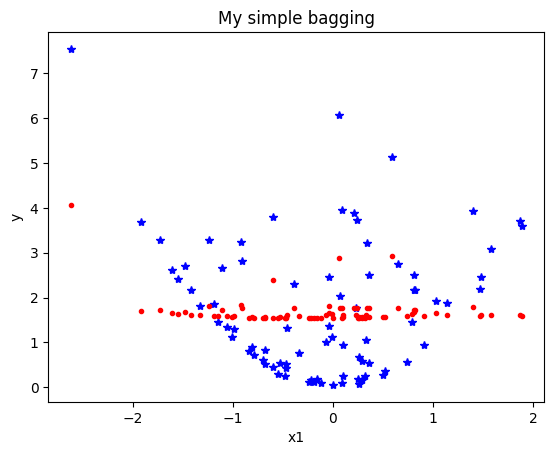

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
list_of_algos = []
sub_sample_size = int(0.9*len(X_data))
X_data =pd.DataFrame(X_data)
y_data = pd.DataFrame(y_data)
#fit model
for i in range(100):
  clf = DecisionTreeRegressor(max_depth=1 ,max_features=5)
  #choose random indices
  indices = np.random.choice(a= X_data.index, size = sub_sample_size, replace = True)
  clf.fit(X_data.loc[indices,:],y_data.loc[indices])
  list_of_algos.append(clf)

#predict
Predict_bagging = list_of_algos[0].predict(X_data)
for i in range(1, len(list_of_algos)):
  Predict_bagging = (Predict_bagging+list_of_algos[i].predict(X_data)/i)*(i/(i+1))
print(Predict_bagging)
X_data = X_data.to_numpy()
plt.plot(X_data[:,0], y_data, '*b')
plt.plot(X_data[:,0],Predict_bagging, '.r')
plt.title('My simple bagging')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()


# Part 2: models

Let's consider out apps dataset and try to solve 2 cases with data:

**Case 1: Pricing new App**

Imagine you want to launch new app and you need to decide how much to charge for the app. You have conducted the survey - showed the app prototype to the public, and collected the reviews. **So you need to learn how to infer optimal price from the review infromation.**



**Case 2: Predicting rating of the App**

?? Busines sense ??



In [ ]:
import pandas as pd

apps = pd.read_csv('https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore.csv')
reviews = pd.read_csv('https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore_user_reviews.csv')

merged_data = reviews.merge(apps, on="App", how="inner")
merged_data.head(2)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Translated_Review       72605 non-null   object 
 2   Sentiment               72615 non-null   object 
 3   Sentiment_Polarity      72615 non-null   float64
 4   Sentiment_Subjectivity  72615 non-null   float64
 5   Category                122662 non-null  object 
 6   Rating                  122622 non-null  float64
 7   Reviews                 122662 non-null  object 
 8   Size                    122662 non-null  object 
 9   Installs                122662 non-null  object 
 10  Type                    122662 non-null  object 
 11  Price                   122662 non-null  object 
 12  Content Rating          122662 non-null  object 
 13  Genres                  122662 non-null  object 
 14  Last Updated        

In [ ]:
merged_data['Price'].str.strip('$').apply(float).unique()

array([ 0.  , 33.99,  7.99,  9.99,  2.49,  3.99,  6.99,  3.95,  2.99,
        1.99, 11.99,  4.99, 29.99,  0.99])

In [ ]:
merged_data  = merged_data.dropna()

# Convert price into float
merged_data['Price'] =merged_data['Price'].apply(lambda string:float(string.strip('$')))


# Drop rows without exact app size
merged_data.drop(index = merged_data[merged_data['Size'] == 'Varies with device'].index, axis = 0,inplace = True)

# Convert Size to number
merged_data['Size'] = merged_data['Size'].apply(lambda x: x.replace(",",".") )
merged_data['Size'] =merged_data['Size'].apply(lambda x: (10**6)*float(x[:-1]) if x[-1] == "M"\
                                               else ( (10**3)*float(x[:-1]) if x[-1] == "k" else x) )

# Convert Installs to number
merged_data['Installs'] = merged_data['Installs'].apply(lambda x: float(x[:-1].replace(",","")) )

cat_columns = ['Sentiment', 'Category', 'Type','Content Rating', 'Genres']
merged_data[cat_columns] = merged_data[cat_columns].astype('category')

merged_data['Reviews'] = merged_data['Reviews'].astype('float')

<ipython-input-81-62fe246a9db7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Price'] =merged_data['Price'].apply(lambda string:float(string.strip('$')))
<ipython-input-81-62fe246a9db7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.drop(index = merged_data[merged_data['Size'] == 'Varies with device'].index, axis = 0,inplace = True)
<ipython-input-81-62fe246a9db7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split

y_data = merged_data["Price"]
X_data = merged_data.drop(['Price', 'Translated_Review', 'Last Updated', 'Current Ver', 'Android Ver', 'App'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

#### **XGBoost**

**General Parameters**

<details>
  <summary> <font color="#282FA4 "><b>Details</b></font> </summary>



`Booster (default=gbtree):` Type of model to run at each iteration (gbtree= tree-based, gblinear=linear model)

`silent (defualt=0):` Set to True to aviod printing updates with each cycle

`nthread (default= max available):` Number of threads for parallel processing.
</details>


**Tree Booster Parameters**

<details>
  <summary> <font color="#282FA4 "><b>Details</b></font> </summary>

`eta (default=0.3):` Aliased as learning rate, typical values- 0.01-0.3

`min_child_weight (default=1): `Defines the minimum sum of the weights of all observations required in child. Used to control overfitting, high values can lead to underfitting.

`max_depth (default=6):` Higher depth allows learned relations very specific to a particular sample. Typical values are 3-10.

`gamma (default=0): `Minimum loss reduction required to partition on a leaf node of a tree- the larger gamma the more conservative the algorithm.

`max_delta_step (default=0):` Maximum delta step we allow each leaf output to be. This is generally not used but might help in logistic regression when the class is extremely imbalanced.

`subsample (default=1):` Subsample ratio of the training instances, if 0.5 XGBoost would randomly sample half of the training data prior to growing trees, and this will prevent overfitting.

`colsample_bytree (default=1):` Denotes the fraction of features to use.

`colsample_bylevel (defualt=1):` Denotes the fraction of features but in terms of the level rather than tree.

`lambda (default=1): `L2 regularization parameter.

`alpha (defualt=0): ` L1 regularization parameter.

`scale_pos_weight (default=1):` Controls the balance of positive and negative weights, its useful for unbalanced classes.

</details>


**Learning Task Parameters**

<details>
  <summary> <font color="#282FA4 "><b>Details</b></font> </summary>

These parameters define the optimization objective to be calculated at each step.

objective (default=linear): The loss function, logistic, softmax, and softprob (same as softmax but returns predicted probabilites not predicted classes).
eval_metric (default based on objective): The metric used to validate data like: rmse, mae, logloss, error(binary classification), merror (multiclass error), mlogloss, auc (area under the curve).

</details>






🔗 [Chen & Guestrin (2016) "XGBoost: A Scalable Tree Boosting System"](https://arxiv.org/abs/1603.02754)

🔗 [Documentation](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

In [ ]:
!pip install xgboost

In [ ]:
model_params = {
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'random_state': 42}

def magic( objective,
    eval_metric,
    random_state,g=0,
    ):
  return 0
magic(**model_params)

0

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

model_params = {
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'random_state': 42,
    'enable_categorical':True,
    'subsample': 0.7,
    'colsample_bylevel': 0.7,
    'max_depth': 6,
    'num_leaves': 256,
    'verbosity': 0,
}


reg_xgb_init = xgb.XGBRegressor(**model_params)

reg_xgb = GridSearchCV(reg_xgb_init,
                   {'max_depth': [1, 3, 5], 'n_estimators': [50, 150], 'learning_rate': [0.001, 0.01, 0.1, 1]},
                   cv = 3)

reg_xgb.fit(X_train, y_train)

print('best RMSE:', reg_xgb.best_score_) # validation score
print('best RMSE:', reg_xgb.best_estimator_)

best RMSE: 0.99999498179575
best RMSE: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None, num_leaves=256,
             num_parallel_tree=None, ...)


In [ ]:
reg_xgb.best_estimator_.predict()

#### **Light GBM**


🔗 [Ke et al. (2017) 'LightGBM: A Highly Efficient Gradient Boosting
Decision Tree'](https://papers.nips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf)

🔗 [Documentation](https://lightgbm.readthedocs.io/en/latest/Parameters.html)

best RMSE: 0.9996705251873624


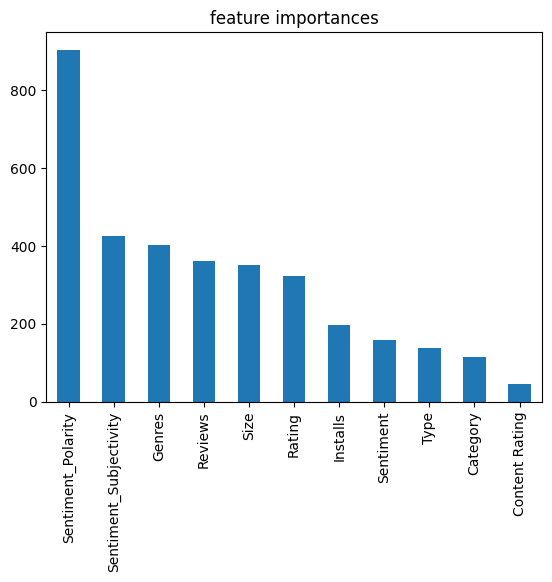

In [ ]:
import lightgbm as lgb

model_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'max_depth': 8,
    'random_state': 42,
    'verbosity': -1,
}


reg_lgb_init = lgb.LGBMRegressor(**model_params)

reg_lgb = GridSearchCV(reg_lgb_init,
                   {'max_depth': [1, 3, 5], 'n_estimators': [50, 150], 'learning_rate': [0.001, 0.01, 0.1, 1]},
                   cv = 3)

reg_lgb.fit(X_train, y_train)

print('best RMSE:', reg_lgb.best_score_) # validation score

# feature importances
fi = pd.Series(reg_lgb.best_estimator_.feature_importances_, index=X_train.columns)
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('feature importances')
plt.show()

#### **CatBoost**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


ModuleNotFoundError: ignored

In [ ]:

model_params = {'loss_function': 'RMSE',
          'cat_features': ['Sentiment', 'Category', 'Type','Content Rating', 'Genres'], 'verbose': False}


reg_cb_init = CatBoostRegressor()
reg_cb_init.set_params(**model_params)

reg_cb = GridSearchCV(reg_cb_init,
                   # you can play with tuning, up to your CPU performance:
                   {'max_depth': [1, 3, 5], 'n_estimators': [50, 150], 'learning_rate': [0.001, 0.01, 0.1, 1]},
                   cv = 3)

reg_cb.fit(X_train, y_train)

print('best RMSE:', reg_cb.best_score_) # validation score

# feature importances
fi = pd.Series(reg_cb.best_estimator_.feature_importances_, index=X_train.columns)
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('feature importances')
plt.show()


<center><img src="https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W." width="800px"></center>